# LABORATORIO 4 - Práctica 3: Puntos de enfermería
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Apartado 1: Utiliza varias configuraciones para el modelo que más se adapte y teniendo en cuenta los tipos de distancias entre elementos. ¿Cuál es la k del modelo?](#id1)
1. [Apartado 2: Dibuja un dendograma con los clusters obtenidos. Explica alguna de las relaciones interesantes que puedas encontrar.](#id2)

---

<div id='id0'>

## Introducción
---
Una empresa de colocación de trabajadores pretende hacer una aplicación para ser más eficiente en los enfermeros y enfermeras que asignan para cuidados en hogares. 

Para ello se dispone del archivo csv “enfermeria” con las características de las distintas personas que pueden optar a los puestos. Crear un modelo que agrupe los candidatos y establezca como se relacionan entre ellos jerárquicamente.

---

### Importar Librerías
---

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


### Leemos el fichero enfermeria.csv
---

In [32]:
# Cargar el archivo csv en un dataframe de pandas
data = pd.read_csv('Dataset_Lab04/Dataset_Lab04/enfermeria.csv')
data.head(5)

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


<div id='id1'/>

## Apartado 1 - Utiliza varias configuraciones para el modelo que más se adapte y teniendo en cuenta los tipos de distancias entre elementos. ¿Cuál es la k del modelo?
---

### Preprocesamiento

La columna "recommendation" es la variable objetivo o target que queremos predecir. En este caso, se está realizando un análisis de clustering, que es una técnica de aprendizaje no supervisado, es decir, no se tiene una variable objetivo para entrenar el modelo. Por lo tanto, la columna "recommendation" no es necesaria para el análisis de clustering y se puede eliminar del conjunto de datos.

In [33]:
X = pd.get_dummies(data.drop('recommendation', axis=1))
X.head(5)

,parents_occupation_great_pret,parents_occupation_pretentious,parents_occupation_usual,childs_nursery_critical,childs_nursery_improper,childs_nursery_less_proper,childs_nursery_proper,childs_nursery_very_crit,family_form_complete,family_form_completed,...,housing_conditions_critical,housing_conditions_less_conv,financial_standing_convenient,financial_standing_inconv,social_conditions_nonprob,social_conditions_problematic,social_conditions_slightly_prob,health_conditions_not_recom,health_conditions_priority,health_conditions_recommended
0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0


El método get_dummies de la biblioteca Pandas se utiliza para crear variables dummy a partir de variables categóricas. En este caso, la variable recommendation se elimina del conjunto de datos original y se crean variables dummy para el resto de variables del conjunto de datos (todas las variables excepto recommendation). De esta manera, se obtiene una representación numérica de los datos que puede ser utilizada para entrenar modelos de aprendizaje automático.

Estas líneas de código realizan una transformación de los datos utilizando la técnica de escalado o normalización estándar. El objetivo de esto es transformar los datos originales de manera que cada variable tenga media cero y desviación estándar uno, lo cual ayuda a mejorar la precisión del modelo de clustering.

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Este código aplica el método de la silueta para determinar el número óptimo de clusters en el dataset y dibuja un gráfico del coeficiente de silueta en función del número de clusters.

Para aplicar el método del codo a esta gráfica, se debe buscar el punto de inflexión donde el coeficiente de silueta deja de mejorar significativamente al aumentar el número de clusters. Este punto puede ser considerado como el número óptimo de clusters para el dataset. En general, se busca el "codo" en la curva, es decir, el punto donde la tasa de disminución en el coeficiente de silueta se ralentiza.

La idea detrás del método del codo es iterar a través de diferentes valores de k (el número de clusters) y graficar el valor de WCSS (suma de las distancias al cuadrado de cada punto al centroide de su cluster) para cada valor de k. El objetivo es encontrar el punto en el gráfico donde la disminución de la WCSS comienza a disminuir de manera más lenta, lo que se llama "elbow" (codo). Este punto indica que agregar más clusters no mejora significativamente el modelo.

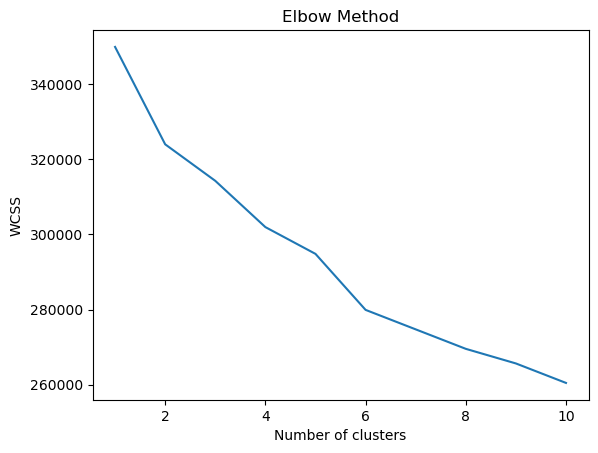

In [36]:
# Determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Se observa un codo claro en el gráfico cuando se consideran 2 clusters, lo cual indica que esa podría ser la elección óptima para K. Sin embargo, debido a que el siguiente punto de codo se encuentra en 4 clusters, se ha decidido visualizar los clusters con K=4. Cabe destacar que la elección final del valor de K depende de la interpretación que se haga a posterior.

### Custering para K=2 y dos componentes

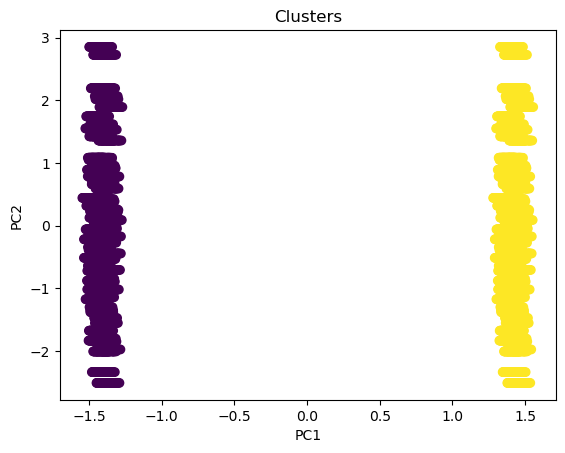

In [37]:
# Clustering: k-means

kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA para visualizar la estructura de los clusters
pca = PCA(n_components=2)
pca.fit(X_scaled)
pca_df = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Clustering para K=4 y dos componentes

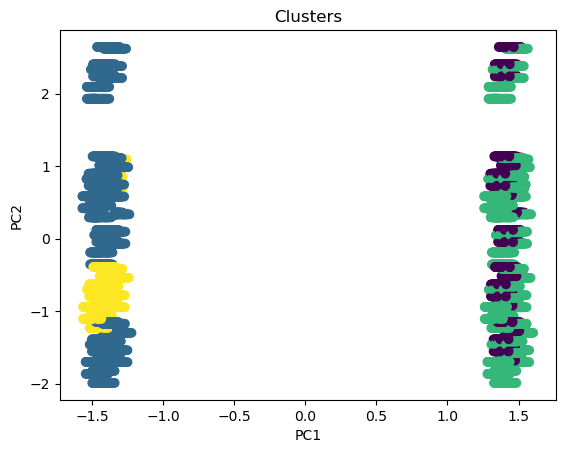

In [38]:
# Clustering: k-means

kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA para visualizar la estructura de los clusters
pca = PCA(n_components=2)
pca.fit(X_scaled)
pca_df = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Cuando se utiliza un valor de K igual a 2, es posible observar dos grupos bien definidos en el conjunto de datos. Estos grupos se encuentran en regiones distintas y no se superponen entre sí, lo que indica una clara separación entre ellos. Sin embargo, al aumentar el valor de K a 4, se puede apreciar que los grupos previamente identificados con K=2 contienen subgrupos más pequeños.

Para una mejor visualización de estos subgrupos, se decide realizar una representación adicional del clustering con K=4 pero con solo tres componentes. Esto implica que se combinarán algunos de los subgrupos previamente identificados en uno solo, con el fin de reducir la complejidad visual y permitir una interpretación más clara de los resultados.

### Clustering para K=4 y tres componentes

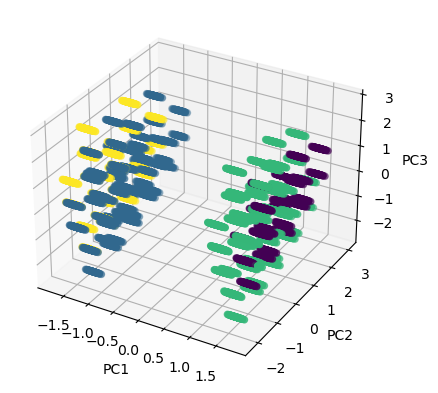

In [39]:
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA para visualizar la estructura de los clusters
pca = PCA(n_components=3)
pca.fit(X_scaled)
pca_df = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = labels

# Crear gráfico en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=labels)

# Establecer etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

Al utilizar K=2 se observan dos grupos claramente definidos y no hay una necesidad inmediata de identificar subgrupos más finos, entonces la elección óptima podría ser K=2. Esto se debe a que los grupos encontrados son distintos y excluyentes, lo que proporciona una división clara de los datos en dos categorías principales.

<div id='id2'/>

## Apartado 2 - Dibuja un dendograma con los clusters obtenidos. Explica alguna de las relaciones interesantes que puedas encontrar.
---

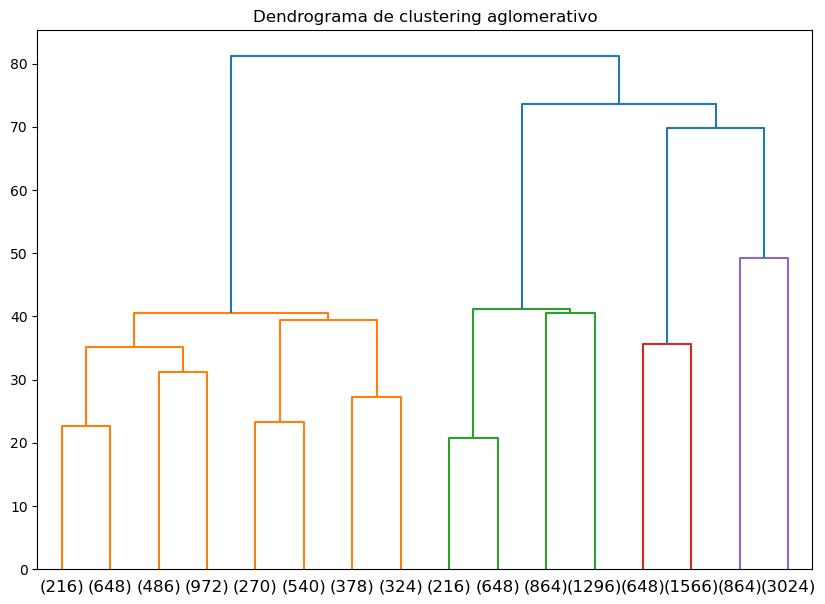

In [40]:
# Guardar la matriz de enlace
linkage_matrix = shc.linkage(X, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma de clustering aglomerativo")
dendrogram = shc.dendrogram(linkage_matrix, truncate_mode='level',p=3)
plt.show()

En el dendrograma, una representación gráfica de la jerarquía de agrupamiento, se puede observar una clara división en dos grupos principales. Esta división en el dendrograma está relacionada con la clara separación de los grupos previamente identificados en el clustering con K=2.

La presencia de dos grupos bien definidos en el dendrograma indica que existe una separación clara y significativa entre ellos. Esto sugiere que los datos se agrupan naturalmente en dos categorías distintas y excluyentes.

Además, al examinar más de cerca los dos grupos principales en el dendrograma, se puede notar la presencia de subgrupos dentro de cada uno de ellos. Esto significa que cada uno de los dos grupos identificados en el clustering con K=2 contiene subdivisiones o subgrupos más pequeños.

Este hallazgo es coherente con la observación realizada en el clustering con K=4, donde se identificaron subgrupos dentro de los dos grupos principales. Por lo tanto, se puede inferir que la presencia de subdivisiones en los grupos principales en el dendrograma está relacionada con la existencia de subgrupos en el clustering con K=4.